# Methodologies  

1. Data Import & Exploration  
2. Identifying Data and Attributes  
3. Determining the Type of Dataset  
4. Data Quality Assessment  
5. Quantitative Statistics  
6. Application of Proximity (Distance Analysis)  
7. Data Mining: Association Rule Mining  


# Data Import & Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fredapi import Fred
import calendar
import holidays

In [56]:

# Read the CSV file
file_path = 'data/wfp_food_prices_phl.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df

C:\Users\Mark Joseph Nicasio\AppData\Local\Temp\ipykernel_16772\2812996776.py:3: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,Retail,PHP,15.0,0.3717
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.4548
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.4461
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.4052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123090,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Calamansi,KG,aggregate,Retail,PHP,71.67,1.4949
123091,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Eggplants,KG,aggregate,Retail,PHP,103.33,2.1555
123092,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Onions (red),KG,aggregate,Retail,PHP,114.17,2.3814
123093,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Papaya,KG,aggregate,Retail,PHP,45.0,0.9387


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123095 entries, 0 to 123094
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       123095 non-null  object
 1   admin1     123095 non-null  object
 2   admin2     123095 non-null  object
 3   market     123095 non-null  object
 4   latitude   123095 non-null  object
 5   longitude  123095 non-null  object
 6   category   123095 non-null  object
 7   commodity  123095 non-null  object
 8   unit       123095 non-null  object
 9   priceflag  123095 non-null  object
 10  pricetype  123095 non-null  object
 11  currency   123095 non-null  object
 12  price      123095 non-null  object
 13  usdprice   123095 non-null  object
dtypes: object(14)
memory usage: 13.1+ MB


In [58]:
df = df.drop(index=0).reset_index(drop=True)

In [59]:
# Filter rows where 'priceflag' is either 'actual' or 'aggregate'
filtered_df = df[df['priceflag'].isin(['actual,aggregate'])]

# Display the filtered rows
filtered_df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
119530,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Potatoes (Irish),KG,"actual,aggregate",Retail,PHP,86.16,1.7011
119531,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Rice (premium),KG,"actual,aggregate",Retail,PHP,46.13,0.9108
119532,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,"actual,aggregate",Retail,PHP,36.65,0.7236
119533,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Rice (special),KG,"actual,aggregate",Retail,PHP,53.23,1.0509
119534,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,"meat, fish and eggs",Eggs,Unit,"actual,aggregate",Retail,PHP,6.83,0.1348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119949,2021-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,vegetables and fruits,Calamansi,KG,"actual,aggregate",Retail,PHP,99.45,2.0744
119950,2021-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,vegetables and fruits,Ginger,KG,"actual,aggregate",Retail,PHP,156.65,3.2676
119951,2021-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,vegetables and fruits,Mangoes (carabao),KG,"actual,aggregate",Retail,PHP,197.03,4.11
119952,2021-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,vegetables and fruits,Onions (red),KG,"actual,aggregate",Retail,PHP,111.64,2.3287


In [60]:
# Check for duplicate rows
duplicate_rows = df_cleaned[df_cleaned.duplicated()]

# Display duplicate rows
duplicate_rows

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,month,month_sin,month_cos,distance_from_central


In [61]:
categorical_cols = [
    "date", "admin1", "admin2", "market", 
    "category", "commodity", "unit", "priceflag", 
    "pricetype", "currency"
]

numerical_cols = ["latitude", "longitude", "price", "usdprice"]

In [62]:
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 40)
    

Value counts for 'date':
date
2020-07-15    2795
2020-10-15    2790
2020-08-15    2782
2020-05-15    2745
2020-11-15    2743
              ... 
2019-06-15      18
2004-02-15      18
2020-02-15      18
2019-12-15      16
2019-11-15      16
Name: count, Length: 299, dtype: int64
----------------------------------------
Value counts for 'admin1':
admin1
Region III                              10625
Region VI                                9119
Region V                                 8893
Region VIII                              8525
Cordillera Administrative region         8287
Region XI                                8202
Region X                                 7190
Region IV-B                              7122
Region IV-A                              7084
Region XII                               6996
Region XIII                              6930
Region VII                               6681
Region I                                 6205
Region II                                6151
Reg

In [63]:
print("Descriptive statistics for numerical columns:")
print(df[numerical_cols].describe())

Descriptive statistics for numerical columns:
       latitude longitude   price usdprice
count    123094    123094  123094   123094
unique      192       190   24478    54978
top        7.18    125.44    30.0   0.8092
freq       2438      2438     474       32


In [64]:
df.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

# Data Dictionary

In [65]:
# Data dictionary descriptions for the columns (Updated variable names)
data_descriptions = {
    "date": "Date when the price was recorded",
    "admin1": "First administrative division (region) where the market is located",
    "admin2": "Second administrative division (city) where the market is located",
    "market": "Name of the specific market where the commodity was recorded",
    "latitude": "Latitude coordinate of the market’s location",
    "longitude": "Longitude coordinate of the market’s location",
    "category": "General category to which the commodity belongs (e.g., 'oil and fats', 'cereals and tubers')",
    "commodity": "Specific item being traded (e.g., rice, wheat, tomatoes)",
    "unit": "Measurement unit of the commodity (e.g., kg, liter, piece)",
    "priceflag": "Flag indicating the reliability or nature of the price data (e.g., actual, aggregate)",
    "pricetype": "Type of price recorded (e.g., wholesale, retail, farmgate)",
    "currency": "Currency in which the price was recorded (e.g., USD, PHP)",
    "price": "Recorded price of the commodity in its local currency",
    "usdprice": "Price of the commodity converted into USD"
}


# Create the data dictionary DataFrame
data_dictionary = pd.DataFrame({
    'Column Name': df.columns,
    'Description': [data_descriptions.get(col, 'No description available') for col in df.columns],
    'Data Type': df.dtypes.values
})

# Display the data dictionary
data_dictionary


,Column Name,Description,Data Type
0,date,Date when the price was recorded,object
1,admin1,First administrative division (region) where t...,object
2,admin2,Second administrative division (city) where th...,object
3,market,Name of the specific market where the commodit...,object
4,latitude,Latitude coordinate of the market’s location,object
5,longitude,Longitude coordinate of the market’s location,object
6,category,General category to which the commodity belong...,object
7,commodity,"Specific item being traded (e.g., rice, wheat,...",object
8,unit,"Measurement unit of the commodity (e.g., kg, l...",object
9,priceflag,Flag indicating the reliability or nature of t...,object


# Identifying Data and Attributes

In [66]:
import pandas as pd

# --- Convert Data Types ---
# Convert 'date' to datetime (invalid formats become NaT)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert latitude and longitude to numeric (float)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Convert price and usdprice to numeric (float)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')

# --- Validate Reasonable Values ---
# Define valid conditions for each column:
valid_date = df['date'].notna()  # Date is valid if not NaT

# Add condition to only include dates on or after January 1, 2019
valid_start_date = df['date'] >= pd.Timestamp('2019-01-01')

# Latitude: valid if not NaN and between -90 and 90
valid_lat = df['latitude'].notna() & (df['latitude'] >= -90) & (df['latitude'] <= 90)

# Longitude: valid if not NaN and between -180 and 180
valid_lon = df['longitude'].notna() & (df['longitude'] >= -180) & (df['longitude'] <= 180)

# Price: valid if not NaN and non-negative
valid_price = df['price'].notna() & (df['price'] >= 0)

# usdprice: valid if not NaN and non-negative
valid_usdprice = df['usdprice'].notna() & (df['usdprice'] >= 0)

# Combine all conditions: only rows meeting all criteria are valid
all_valid = valid_date & valid_start_date & valid_lat & valid_lon & valid_price & valid_usdprice

# --- Create a New DataFrame with Only Valid Rows ---
df_cleaned = df[all_valid].copy()

print("Number of rows before cleaning:", len(df))
print("Number of rows after cleaning:", len(df_cleaned))


Number of rows before cleaning: 123094
Number of rows after cleaning: 100921


In [67]:
df_cleaned = df[df['date'].notna()].copy()

In [68]:
# Extract month from the date
df_cleaned['month'] = df_cleaned['date'].dt.month

# Convert month to cyclic features
df_cleaned['month_sin'] = np.sin(2 * np.pi * df_cleaned['month'] / 12)
df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['month'] / 12)


In [69]:
central_lat = 14.5995   # Example: Latitude for Manila, Philippines
central_lon = 120.9842  # Example: Longitude for Manila, Philippines

# Define the Haversine function to compute distance in kilometers
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Earth's radius in kilometers (6371 km)
    km = 6371 * c
    return km

df_cleaned['distance_from_central'] = haversine_distance(central_lat, central_lon, df_cleaned['latitude'], df_cleaned['longitude'])

print(df_cleaned[['market', 'latitude', 'longitude', 'distance_from_central']].tail())

             market  latitude   longitude  distance_from_central
123089  Butuan City  8.957268  125.534029             799.170559
123090  Butuan City  8.957268  125.534029             799.170559
123091  Butuan City  8.957268  125.534029             799.170559
123092  Butuan City  8.957268  125.534029             799.170559
123093  Butuan City  8.957268  125.534029             799.170559


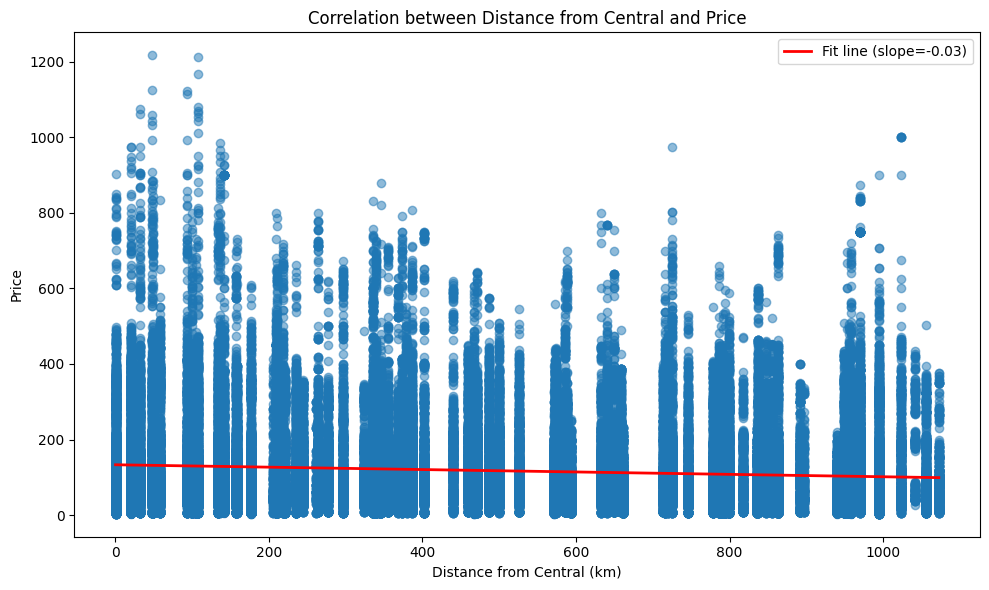

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['distance_from_central'], df_cleaned['price'], alpha=0.5)
plt.xlabel('Distance from Central (km)')
plt.ylabel('Price')
plt.title('Correlation between Distance from Central and Price')

slope, intercept = np.polyfit(df_cleaned['distance_from_central'], df_cleaned['price'], 1)
x_vals = np.array([df_cleaned['distance_from_central'].min(), df_cleaned['distance_from_central'].max()])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', linewidth=2, label=f'Fit line (slope={slope:.2f})')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
def determine_climate_season(date):
    month = date.month
    if 6 <= month <= 11:
        return "Rainy Season"
    elif month in [12, 1, 2]:
        return "Cool Dry Season"
    elif month in [3, 4, 5]:
        return "Hot Dry Season"
    else:
        return "Unknown"  # Fallback in case of unexpected values

df_cleaned['climate_season'] = df_cleaned['date'].apply(determine_climate_season)


In [ ]:
# --- Retrieve USD-PHP Exchange Rate Data from FRED ---
fred = Fred(api_key='3acdf33d996d4189da7cb3843f1c5023') 

# Retrieve the exchange rate series from FRED using NBPHBIS (USD-PHP exchange rate)
exchange_series = fred.get_series('NBPHBIS', observation_start='2019-01-01', observation_end='2025-01-15')

df_exchange = exchange_series.to_frame(name='usd_exchange_rate')
df_exchange.index = pd.to_datetime(df_exchange.index)

# --- Process Exchange Rate Data ---
df_exchange_monthly = df_exchange.resample('M').mean().reset_index()
df_exchange_monthly['date'] = df_exchange_monthly['index'].apply(lambda d: d.replace(day=15))
df_exchange_final = df_exchange_monthly[['date', 'usd_exchange_rate']]

print("Exchange Rate Data (first 5 rows):")
print(df_exchange_final.head())

df_merged = pd.merge(df_cleaned, df_exchange_final, on='date', how='left')

print("\nMerged Data with Exchange Rate (last 5 rows):")
print(df_merged.tail())


Exchange Rate Data (first 5 rows):
        date  usd_exchange_rate
0 2019-01-15              93.76
1 2019-02-15              94.16
2 2019-03-15              93.74
3 2019-04-15              94.87
4 2019-05-15              95.28

Merged Data with Exchange Rate (last 5 rows):
         date       price  usd_exchange_rate
68 2024-09-15  177.123102              95.15
69 2024-10-15  192.775785              94.00
70 2024-11-15  198.743986              93.73
71 2024-12-15  184.414716              95.07
72 2025-01-15  100.001305              95.72


/tmp/ipykernel_181275/4084627989.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_exchange_monthly = df_exchange.resample('M').mean().reset_index()


In [17]:
def flag_pandemic_phase(date):
    """
    Flag the pandemic phase based on the date.
    
    - Pre-pandemic: before March 1, 2020
    - Pandemic: from March 1, 2020 up to December 31, 2021
    - Post-pandemic: from January 1, 2022 onward
    """
    if date < pd.Timestamp('2020-03-01'):
        return "Pre-pandemic"
    elif date < pd.Timestamp('2022-01-01'):
        return "Pandemic"
    else:
        return "Post-pandemic"
    
df_cleaned['pandemic_phase'] = df_cleaned['date'].apply(flag_pandemic_phase)
print(df_cleaned[['date', 'pandemic_phase']].head(10))

        date pandemic_phase
0 2019-01-15   Pre-pandemic
1 2019-02-15   Pre-pandemic
2 2019-03-15   Pre-pandemic
3 2019-04-15   Pre-pandemic
4 2019-05-15   Pre-pandemic
5 2019-06-15   Pre-pandemic
6 2019-07-15   Pre-pandemic
7 2019-08-15   Pre-pandemic
8 2019-09-15   Pre-pandemic
9 2019-10-15   Pre-pandemic


In [ ]:
ph_holidays = holidays.PH(years=range(2019, 2026))

major_holidays_list = [
    "New Year's Day", "Christmas Day",
]

def major_holiday_flag(date, major_list=major_holidays_list):
    """
    Flag whether there is any major holiday within the same month as 'date'.
    Returns 1 if a major holiday is found in that month, otherwise 0.
    """
    year = date.year
    month = date.month
    # Determine the start and end dates of the month
    start_date = pd.Timestamp(year, month, 1)
    end_date = pd.Timestamp(year, month, calendar.monthrange(year, month)[1])
    
    # Check each date in the month for a major holiday
    for single_date in pd.date_range(start_date, end_date):
        if single_date in ph_holidays:
            holiday_name = ph_holidays[single_date]
            # Check if the holiday name matches any in our major list (case insensitive)
            if any(major.lower() in holiday_name.lower() for major in major_list):
                return 1
    return 0

# Assume df is your DataFrame (e.g., df_cleaned or df_merged) with a 'date' column
# where the date is the 15th of each month.
# Ensure the 'date' column is in datetime format:

# Create a new feature 'major_holiday_flag'
df_cleaned['major_holiday_flag'] = df_cleaned['date'].apply(major_holiday_flag)

# Display some rows to verify the new feature
print(df_cleaned[['date', 'major_holiday_flag']].head(20))


         date  major_holiday_flag
0  2019-01-15                   1
1  2019-02-15                   0
2  2019-03-15                   0
3  2019-04-15                   0
4  2019-05-15                   0
5  2019-06-15                   0
6  2019-07-15                   0
7  2019-08-15                   0
8  2019-09-15                   0
9  2019-10-15                   0
10 2019-11-15                   0
11 2019-12-15                   1
12 2020-01-15                   1
13 2020-02-15                   0
14 2020-03-15                   0
15 2020-04-15                   0
16 2020-05-15                   0
17 2020-06-15                   0
18 2020-07-15                   0
19 2020-08-15                   0
